#b23535
#b28035
no linear region found
#99b235
#4eb235
no linear region found
#35b267
#35b2b2
no linear region found
#3567b2
no linear region found
#4e35b2
no linear region found
#9935b2
no linear region found
#b23580
#b23535
no linear region found
#b28035
no linear region found
#99b235
no linear region found
#4eb235
no linear region found
#35b267
no linear region found
                       File Name  \
0   cbPDMS_50ppm_808_4200-100_2x   
1   cbPDMS_50ppm_808_4200-100_2x   
2   cbPDMS_50ppm_808_4200-100_2x   
3   cbPDMS_50ppm_808_4200-100_2x   
4   cbPDMS_50ppm_808_4200-100_2x   
5   cbPDMS_50ppm_808_4200-100_2x   
6   cbPDMS_50ppm_808_4200-100_2x   
7   cbPDMS_50ppm_808_4200-100_2x   
8   cbPDMS_50ppm_808_4200-100_2x   
9   cbPDMS_50ppm_808_4200-100_2x   
10  cbPDMS_50ppm_808_4200-100_2x   
11  cbPDMS_50ppm_808_4200-100_2x   
12  cbPDMS_50ppm_808_4200-100_2x   
13  cbPDMS_50ppm_808_4200-100_2x   
14  cbPDMS_50ppm_808_4200-100_2x   

                                                 P

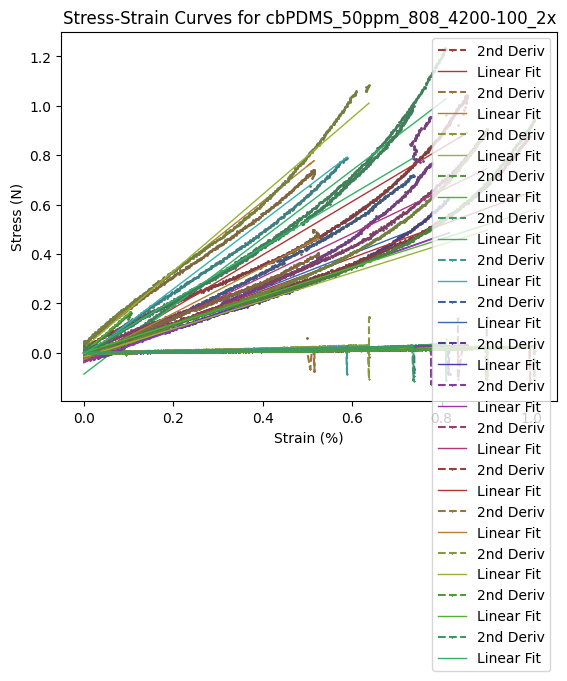

In [2]:
#Problem: Find_Linear_Region often not finding a linear region so temporarily defaulting to set values in those cases

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import colorsys
import os
import pandas as pd

def Second_Derivative_Curve_Smooth(noisyData, smooth_width):
    '''takes list-like input and smooth width to create convolution kernel for calculating the smoothed second order derivative'''
    x1 = np.linspace(-3,3,smooth_width)
    kernel_gaussian2ndDer = (4*x1**2 - 2) * np.exp(-x1**2) / smooth_width * 2
    stress_smoothed_2ndDer = np.convolve(noisyData, kernel_gaussian2ndDer, mode="same")
    return stress_smoothed_2ndDer

def Find_Linear_Region(stress_2ndDer, smoothness_tolerance):
    '''return region of linearity from convolution input as start and end indices'''
    tolerance_index_low, tolerance_index_high = 10, 50 #default values

    for index, i in enumerate(stress_2ndDer):
        if i > smoothness_tolerance:
            tolerance_index_high = index
            return tolerance_index_low, tolerance_index_high
    print('no linear region found')
    return tolerance_index_low, tolerance_index_high

def hsv_to_hex(h, s, v):
    r, g, b = colorsys.hsv_to_rgb(h, s, v)
    r = int(r * 255)
    g = int(g * 255)
    b = int(b * 255)
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

def Customize_HSV_Value(hue, SV):
    return hsv_to_hex(hue, SV, SV)

def Plot_Dataframe_Axes(df, hue, size):
    color_raw = Customize_HSV_Value(hue, .5)
    color_2ndDer = Customize_HSV_Value(hue, .6)
    color_fit = Customize_HSV_Value(hue, .7)
    print(color_fit)
    index_min, index_max = Find_Linear_Region(df['Stress (N) 2nd Deriv'], 0.03)
    m, b = np.polyfit(df['Strain (%)'][index_min:index_max], df['Stress (N)'][index_min:index_max], 1)
    ax.plot(df['Strain (%)'], df['Stress (N)'], 'o', markersize = size, color = color_raw)
    ax.plot(df['Strain (%)'], df['Stress (N) 2nd Deriv'], 'x', markersize = size, ls = '--',color = color_2ndDer, label = '2nd Deriv')
    ax.plot(df['Strain (%)'], m*df['Strain (%)'] + b, color = color_fit, label = 'Linear Fit', linewidth = size)
    return m

def Get_Txts_From_Subdirs(dir_path):
    subdir_names = []
    txt_file_paths = []

    # Walk through the directory
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            # Check if the file is a .txt file
            if file.endswith('.txt') or file.endswith('.csv'):
                subdir_names.append(os.path.basename(root))
                txt_file_paths.append(os.path.join(root, file))

    # Create a DataFrame
    df = pd.DataFrame({
        'File Name': subdir_names,
        'Path': txt_file_paths
    })

    return df

def Workup_SS_Data(df_index):
    width = 6
    hue = 1
    sampleNames = []
    YM = []
    for file in df_index['Path']:
        sampleNames.append(file.split("\\")[-1].split(".")[-2])
        df = pd.read_csv(file, sep='\t', names = ['Crosshead', 'Load', 'Time', 'Strain (%)', 'Video Time'], skiprows = 8)
        thickness = 3
        crossSection = width * thickness 
        df['Stress (N)'] = df['Load'] / crossSection
        df['Stress (N) 2nd Deriv'] = Second_Derivative_Curve_Smooth(df['Stress (N)'], 6)
        YM.append(Plot_Dataframe_Axes(df, hue % 1, 1))
        hue += .1
    df_index['Name'] = sampleNames
    df_index['YM'] = YM

if __name__ == "__main__":
    ## INIT ##
    fig, ax = plt.subplots()
    dirPath = r'CSVs\220207_cbPDMS\cbPDMS_50ppm_808_4200-100_2x'
    folderName = dirPath.split("\\")[-1]

    ## DATA PROCESSING ##
    df_index = Get_Txts_From_Subdirs(dirPath)
    Workup_SS_Data(df_index)
    print(df_index)
    
    ## PLOT FORMATTING ##
    plt.title(f"Stress-Strain Curves for {folderName}")
    plt.xlabel('Strain (%)')
    plt.ylabel('Stress (N)')
    plt.legend()
    plt.show()